### Введение.
Необходимо определить рыночную стоимость объектов недвижимости, изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра. Изучить время продажи квартиры. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго. Убрать редкие и выбивающиеся значения. Определить факторы, которые больше всего влияют на стоимость квартиры. Изучить зависимость цены от площади, числа комнат, удалённости от центра, на каком этаже расположена квартира. Также изучить зависимость от даты размещения. Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья. Изучить предложения квартир. Выделить квартиры в Санкт-Петербурге. Выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах. Посчитать среднюю цену для каждого километра. Построить график зависимости цены от удалённости от центра. Определить границу, где график сильно меняется. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы.

Исходные данные:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1.

Импорт библиотек и данных, вывод общей информации о таблице.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from io import BytesIO
import requests

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 30)

spreadsheet_id = '19yu3Zl4oTRPiOoZapS6lIqPd8UV7QBYR6USgwfbcMM8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

try:
    
    data = pd.read_csv(BytesIO(r.content))
        
except:
    
    data = pd.read_csv('/datasets/real_estate_data.csv', '\t')

display(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Шаг 2.

Преобразование типа данных `rst_day_exposition` в `datetime64[ns]`.

In [2]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # преобразование типа

Заменяем слишком высокие потолки (более 5м) и пропуски потолков медианой потолков.

In [3]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.loc[(data['ceiling_height'] > 5, 'ceiling_height')] = data['ceiling_height'].median()

В столбце `floors_total` удалены `NaN`, заменен тип данных на `int64`.

In [4]:
#data = data.query('floors_total != "NaN"').reset_index(drop = True)
data = data[~data['floors_total'].isna()].reset_index(drop = True)
data['floors_total'] = data['floors_total'].astype('int64')

Пропуски и площадь меньше 8м в столбце `living_area` заполняем медианой по комнате.

In [5]:
for rooms in data['rooms'].unique(): # для всех уникальных значений в 'rooms'
    median = data.loc[data['rooms'] == rooms, 'living_area'].median() # рассчитываем медиану в 'living_area' с учетом 'rooms'
    #print(rooms, median) # вывод соответствия категорий из 'rooms' медиане по 'living_area'
    # замена NaNов в living_area на медиану по комнате
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area'] = median
    # замена жилой площади < 8м на медиану по комнате
    data.loc[(data['living_area'] < 8) & (data['rooms'] == rooms), 'living_area'] = median     

Пропуски в столбце `is_apartment` заполняем значением False.

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуски в `kitchen_area` заполняем медианой всей таблицы. 

In [7]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

Пропуски в `balcony` заполняем `0`, считая, что NaN означает отсутствие балкона.

In [8]:
data['balcony'] = data['balcony'].fillna(0.0)
data['balcony'] = data['balcony'].astype('int64')

Значения столбца `locality_name` приведены к нижнему регистру. Отброшены строки, в которых были NaNы.

In [9]:
data['locality_name'] = data['locality_name'].str.lower()
data = data[~data['locality_name'].isna()].reset_index(drop = True)

В `airports_nearest` те пропуски, для которых можно подсчитать медиану по `locality_name` заменяем соответствующей медианой, остальные - медианой датасета.

In [10]:
for locality_name in data['locality_name'].unique(): # для всех уникальных значений в 'locality_name'
    # рассчитываем медиану в 'airports_nearest' с учетом 'locality_name'
    median = data.loc[data['locality_name'] == locality_name, 'airports_nearest'].median() 
    # замена NaNов в airports_nearest на медиану по locality_name
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == locality_name), 'airports_nearest'] = median 
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

Изменяем название столбца `cityCenters_nearest` на `citycenters_nearest`. Пропуски, для которых можно подсчитать медиану по locality_name заменяем соответствующей медианой, остальные - медианой датасета.

In [11]:

data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'}, inplace=True)
#display(data['citycenters_nearest'].describe())
#display(data['citycenters_nearest'].isna().sum())
#display(data['citycenters_nearest'].value_counts().sort_values(ascending = False))

for locality_name in data['locality_name'].unique(): # для всех уникальных значений в 'locality_name'
    # рассчитываем медиану в 'citycenters_nearest' с учетом 'locality_name'
    median = data.loc[data['locality_name'] == locality_name, 'citycenters_nearest'].median()
    # замена NaNов в citycenters_nearest на медиану по locality_name
    data.loc[(data['citycenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'citycenters_nearest'] = median 

#display(data['citycenters_nearest'].isna().sum())
data['citycenters_nearest'] = data['citycenters_nearest'].fillna(data['citycenters_nearest'].median())

В `parks_around3000` те пропуски, для которых можно подсчитать медиану по locality_name заменяем соответствующей медианой, остальные - медианой датасета.

In [12]:
for locality_name in data['locality_name'].unique(): # для всех уникальных значений в 'locality_name'
    # рассчитываем медиану в 'parks_around3000' с учетом 'locality_name'
    median = data.loc[data['locality_name'] == locality_name, 'parks_around3000'].median() 
    # замена NaNов в parks_around3000 на медиану по locality_name
    data.loc[(data['parks_around3000'].isna()) & (data['locality_name'] == locality_name), 'parks_around3000'] = median 
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())

В `parks_nearest` те пропуски, для которых можно подсчитать медиану по locality_name заменяем соответствующей медианой, остальные - медианой датасета.

In [13]:
for locality_name in data['locality_name'].unique(): # для всех уникальных значений в 'locality_name'
    # рассчитываем медиану в 'parks_nearest' с учетом 'locality_name'
    median = data.loc[data['locality_name'] == locality_name, 'parks_nearest'].median() 
    # замена NaNов в parks_nearest на медиану по locality_name
    data.loc[(data['parks_nearest'].isna()) & (data['locality_name'] == locality_name), 'parks_nearest'] = median 
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

В `ponds_around3000` те пропуски, для которых можно подсчитать медиану по locality_name заменяем соответствующей медианой, остальные - медианой датасета.

In [14]:
for locality_name in data['locality_name'].unique(): # для всех уникальных значений в 'locality_name'
    # рассчитываем медиану в 'ponds_around3000' с учетом 'locality_name'
    median = data.loc[data['locality_name'] == locality_name, 'ponds_around3000'].median() 
    # замена NaNов в ponds_around3000 на медиану по locality_name
    data.loc[(data['ponds_around3000'].isna()) & (data['locality_name'] == locality_name), 'ponds_around3000'] = median 
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())

В `ponds_nearest` те пропуски, для которых можно подсчитать медиану по locality_name заменяем соответствующей медианой, остальные - медианой датасета.

In [15]:
for locality_name in data['locality_name'].unique(): # для всех уникальных значений в 'locality_name'
    # рассчитываем медиану в 'ponds_nearest' с учетом 'locality_name'
    median = data.loc[data['locality_name'] == locality_name, 'ponds_nearest'].median() 
    # замена NaNов в ponds_nearest на медиану по locality_name
    data.loc[(data['ponds_nearest'].isna()) & (data['locality_name'] == locality_name), 'ponds_nearest'] = median
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

В `days_exposition` пропуски заполним разностью между максимальным значением в `first_day_exposition` и фактическим значением `first_day_exposition`

In [16]:
data['days_exposition_missing'] = data['days_exposition'].isna().astype('int64')
#data.groupby('first_day_exposition').agg({'days_exposition_missing': 'sum'}).plot()
#plt.show()
#display(data['days_exposition'].isna().sum())
max_dt = data['first_day_exposition'].max()
data.loc[data['days_exposition'].isna(), 
         'days_exposition'] = (max_dt - data.loc[data['days_exposition'].isna(), 'first_day_exposition']).dt.days
#display(data['days_exposition'].isna().sum())
data['days_exposition'] = data['days_exposition'].astype('int64')

### Предобработка данных. Вывод:

- в столбеце `total_images` нет пропусков и отклонений;
- в столбеце `last_price` нет пропусков и отклонений;
- в столбеце `total_area` нет пропусков и отклонений;
- в столбеце `first_day_exposition` нет пропусков и отклонений, столбец приведен к `datetime64[ns]`;
- в столбеце `ceiling_height` заменяем слишком высокие потолки (более 5м) и пропуски потолков медианой потолков;
- в столбеце `floors_total` удалены `NaN`, заменен тип данных на `int64`;
- в столбеце `living_area` пропуски и площадь меньше 8м заполняем медианой по комнате;
- в столбеце `floor` нет пропусков и отклонений;
- в столбеце `is_apartment` пропуски заполняем значением False;
- в столбеце `studio` нет пропусков и отклонений;
- в столбеце `open_plan` нет пропусков и отклонений;
- в столбеце `kitchen_area` пропуски заполняем медианой всего столбца;
- в столбеце `balcony` пропуски заполняем 0, считая, что NaN означает отсутствие балкона. Заменен тип данных на `int64`;
- в столбеце `locality_name` значения привидены к нижнему регистру. Отброшены строки, в которых были NaNы;
- в столбеце `airports_nearest` те пропуски, для которых можно подсчитать медиану по `locality_name` заменяем соответствующей медианой, остальные - медианой датасета;
- в столбеце `cityCenters_nearest` изменяем название на `citycenters_nearest`. Пропуски, для которых можно подсчитать медиану по `locality_name` заменяем соответствующей медианой, остальные - медианой датасета;
- в столбеце `parks_around3000` те пропуски, для которых можно подсчитать медиану по `locality_name` заменяем соответствующей медианой, остальные - медианой датасета;
- в столбеце `parks_nearest` те пропуски, для которых можно подсчитать медиану по `locality_name` заменяем соответствующей медианой, остальные - медианой датасета;
- в столбеце `ponds_around3000` те пропуски, для которых можно подсчитать медиану по `locality_name` заменяем соответствующей медианой, остальные - медианой датасета;
- в столбеце `ponds_nearest` те пропуски, для которых можно подсчитать медиану по `locality_name` заменяем соответствующей медианой, остальные - медианой датасета;
- в столбеце `days_exposition` пропуски заполним разностью между максимальным значением в `first_day_exposition` и фактическим значением `first_day_exposition`

### Шаг 3

Добавление столбца `square_meter_price` - цена квадратного метра.

In [17]:
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(decimals=2)

Добавление столбца `publ_of_advertisement` - порядковый номер дня недели публикации объявления.

In [18]:
data['publ_of_advertisement'] = data['first_day_exposition'].dt.weekday

Добавление столбца `floor_category` - категоризация этажей.

In [19]:
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1) 

Добавление столбца `living_total_area` - соотношение жилой и общей площади.

In [20]:
data['living_total_area'] = ((data['living_area'] / data['total_area']) * 100).round(decimals=2)

Добавление столбца `kitchen_total_area` - отношение площади кухни к общей.

In [21]:
data['kitchen_total_area'] = ((data['kitchen_area'] / data['total_area']) * 100).round(decimals=2)

### Шаг 4

Гистограммы для: цены, площади, числа комнат, высоты потолков.

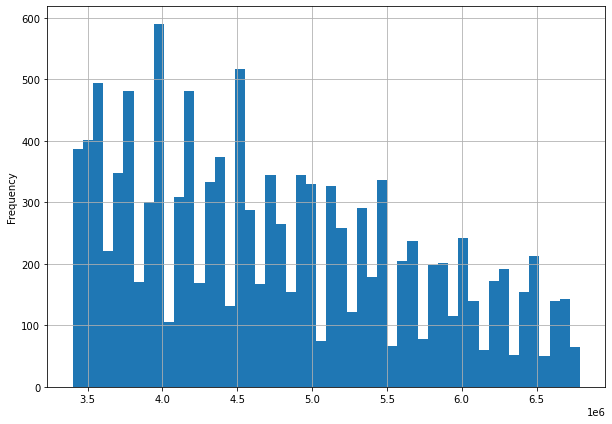

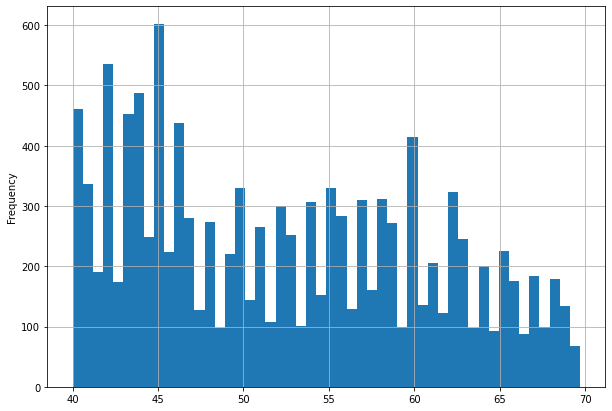

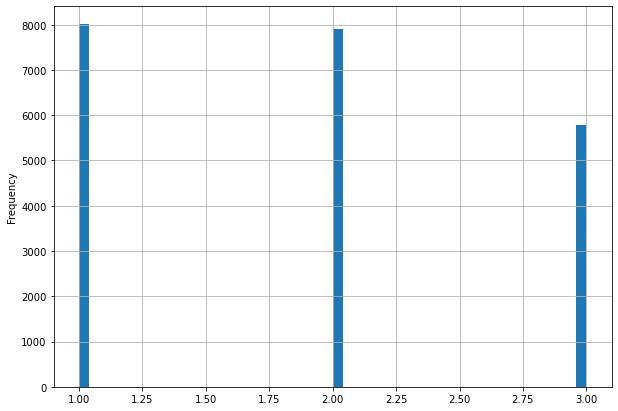

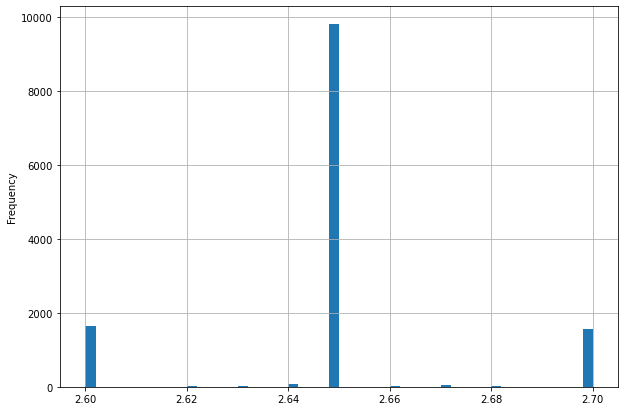

In [22]:
#display(data.columns)
hist_param = ['last_price', 'total_area', 'rooms', 'ceiling_height']
for hist in hist_param:
    q1 = data[hist].quantile(0.25)
    q3 = data[hist].quantile(0.75)
    iqr = q3 - q1
    data[hist].plot(kind = 'hist', y = 'hist', bins = 50, range = (q1, q3), grid = True, figsize = (10, 7))
    plt.show()

Изучение времени продажи квартиры. Подсчет среднего и медианы. Описание, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.

count    23565.000000
mean       185.759728
std        233.492930
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

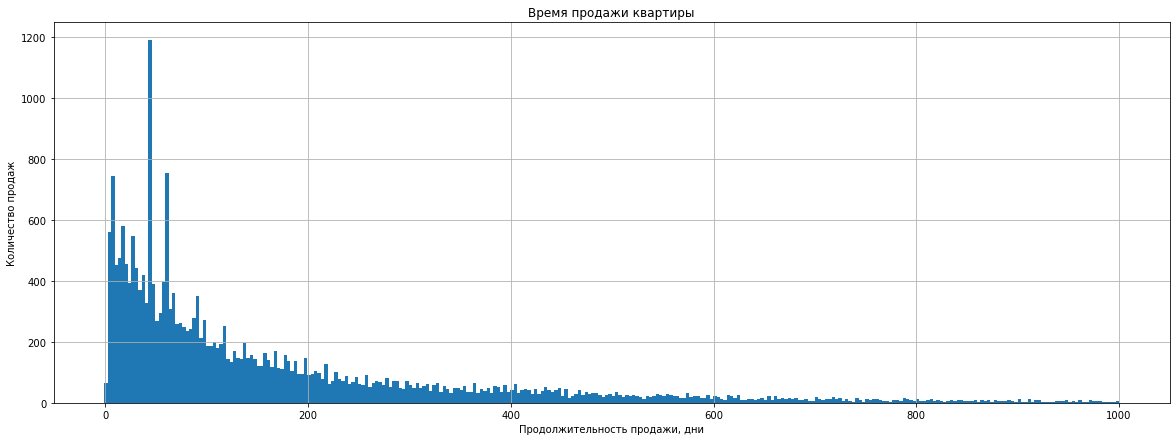

In [23]:
display(data['days_exposition'].describe())
#display(data.loc[data['days_exposition'] == 20, 'days_exposition'].value_counts())
#display(data['days_exposition'].sort_values(ascending = False).value_counts(),)
data['days_exposition'].plot(kind = 'hist', y = 'days_exposition', 
                             bins = 300, range = (-1, 1000), grid = True, figsize = (20, 7))
plt.title('Время продажи квартиры')
plt.xlabel('Продолжительность продажи, дни')
plt.ylabel('Количество продаж')
plt.show()
#plt.ylim(-100, 2000)
#plt.xlim(0, 2)
#data.boxplot('days_exposition')

Вывод: 
среднее: 186 дней, медиана: 94 дня. Продажа обычно занимает от 43 до 237 дней. Менее 43 дней считается быстрая продажа. Более 237 мней считается долгая продажа.

Изучение редких и выбившихся значений для солбцов `last_price`,`total_area`,`rooms`,`ceiling_height`, `days_exposition`, `citycenters_nearest` диаграммой размаха.

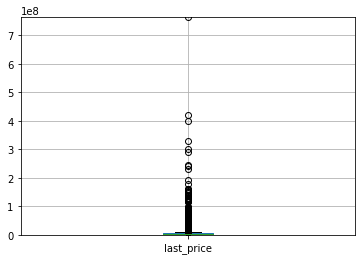

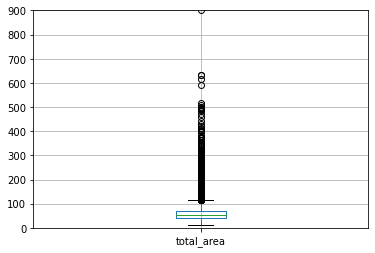

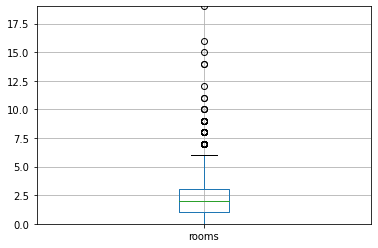

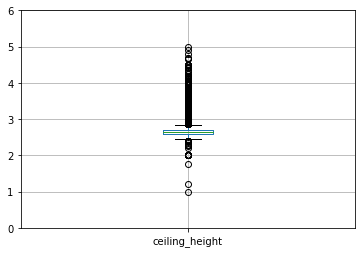

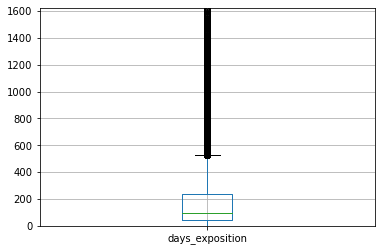

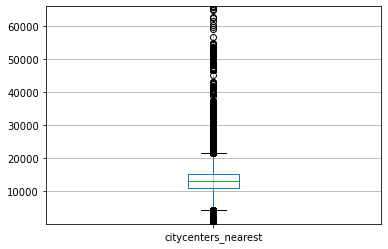

In [24]:
#display(data.columns)
#display(data['citycenters_nearest'].describe())'total_area':[0, 900]

parameters_chart = data[['last_price','total_area','rooms','ceiling_height', 'days_exposition', 'citycenters_nearest']]
parametrs_dict = {'last_price':[0, 763000000], 'total_area':[0, 900], 'rooms':[0, 19], 
                  'ceiling_height':[0, 6], 'days_exposition':[0, 1618], 'citycenters_nearest':[181, 65968]}
for parameter in parameters_chart:
    data.boxplot(parameter)
    plt.ylim(parametrs_dict[parameter][0], parametrs_dict[parameter][1])
    plt.show()

Расчет размахов "усов" для `last_price`, `total_area`, `rooms`, `ceiling_height`, `days_exposition` и `citycenters_nearest` для исключения редких и выбивающихся значений, находящихся за пределами "усов". Создание нового `df` - `good_data` без редких и выбивающихся значений. 

In [25]:
#расчет левого и правого уса для last_price
last_price_low_w = data['last_price'].quantile(0.25) - ((data['last_price'].quantile(0.75) - data['last_price'].quantile(0.25)) * 1.5)
last_price_high_w = data['last_price'].quantile(0.75) + ((data['last_price'].quantile(0.75) - data['last_price'].quantile(0.25)) * 1.5)

#расчет левого и правого уса для total_area
total_area_low_w = data['total_area'].quantile(0.25) - ((data['total_area'].quantile(0.75) - data['total_area'].quantile(0.25)) * 1.5)
total_area_high_w = data['total_area'].quantile(0.75) + ((data['total_area'].quantile(0.75) - data['total_area'].quantile(0.25)) * 1.5)

#расчет левого и правого уса для rooms
rooms_low_w = data['rooms'].quantile(0.25) - ((data['rooms'].quantile(0.75) - data['rooms'].quantile(0.25)) * 1.5)
rooms_high_w = data['rooms'].quantile(0.75) + ((data['rooms'].quantile(0.75) - data['rooms'].quantile(0.25)) * 1.5)

#расчет левого и правого уса для ceiling_height
ceiling_height_low_w = data['ceiling_height'].quantile(0.25) - ((data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.25)) * 1.5)
ceiling_height_high_w = data['ceiling_height'].quantile(0.75) + ((data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.25)) * 1.5)

#расчет левого и правого уса для days_exposition
days_exposition_low_w = data['days_exposition'].quantile(0.25) - ((data['days_exposition'].quantile(0.75) - data['days_exposition'].quantile(0.25)) * 1.5)
days_exposition_high_w = data['days_exposition'].quantile(0.75) + ((data['days_exposition'].quantile(0.75) - data['days_exposition'].quantile(0.25)) * 1.5)

#расчет левого и правого уса для citycenters_nearest
citycenters_nearest_low_w = data['citycenters_nearest'].quantile(0.25) - ((data['citycenters_nearest'].quantile(0.75) - data['citycenters_nearest'].quantile(0.25)) * 1.5)
citycenters_nearest_high_w = data['citycenters_nearest'].quantile(0.75) + ((data['citycenters_nearest'].quantile(0.75) - data['citycenters_nearest'].quantile(0.25)) * 1.5)

#создание DataFrame good_data без редких и выбивающихся значений
good_data = data.query('((last_price > @last_price_low_w) and (last_price < @last_price_high_w)) and ((total_area > @total_area_low_w) and (total_area < @total_area_high_w)) and ((rooms > @rooms_low_w) and (rooms < @rooms_high_w)) and ((ceiling_height > @ceiling_height_low_w) and (ceiling_height < @ceiling_height_high_w)) and ((days_exposition > @days_exposition_low_w) and (days_exposition < @days_exposition_high_w)) and ((citycenters_nearest > @citycenters_nearest_low_w) and (citycenters_nearest < @citycenters_nearest_high_w))')


In [26]:
#good_data['citycenters_nearest'].plot(kind = 'hist', y = 'citycenters_nearest', 
#                             bins = 300, range = (10000, 15000), grid = True, figsize = (20, 7))
#plt.show()

Вывод. Обнаруженные особенности: 
- в `last_price` исключены выбросы слишком высокой цены, значения средней и медианы сходятся.
- в `total_area` исключены выбросы слишком слишком большой площади, значения средней и медианы сходятся.
- в `rooms` исключены выбросы большого количества комнат, значения средней и медианы сходятся.
- в `ceiling_height` исключены выбросы слишком малой и слишком большой высоты потолка, значения средней и медианы сходятся.
- в `days_exposition` исключены выбросы слишком длительного размещения объявления, значения средней и медианы сходятся.
- в `citycenters_nearest` усреднено расстояние до цента года.


Описание факторов, которые больше всего влияют на стоимость квартиры. Изучение зависимости цены от площади, числа комнат, удалённости от центра. Изучение зависимости цены от того, на каком этаже расположена квартира: первом, последнем или другом.

Изучение зависимости цены от площади.

Коэффициент корреляции: 0.6631435926016771


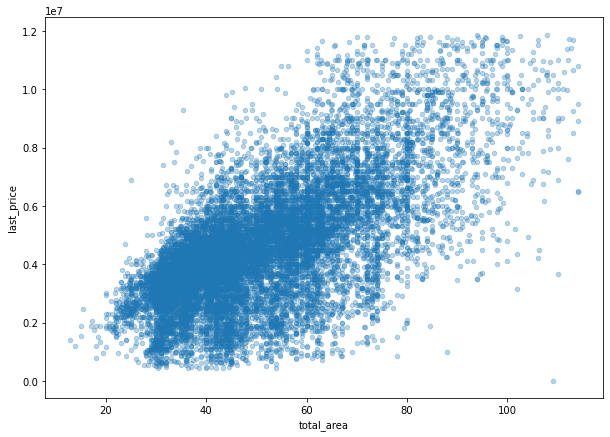

In [27]:
good_data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (10, 7))
print('Коэффициент корреляции: {}'.format(good_data['total_area'].corr(good_data['last_price'])))

Вывод: цена прямо зависит от площади: больше площадь - больше цена;

Изучение зависимости цены от числа комнат.

Коэффициент корреляции: 0.3883968849146181


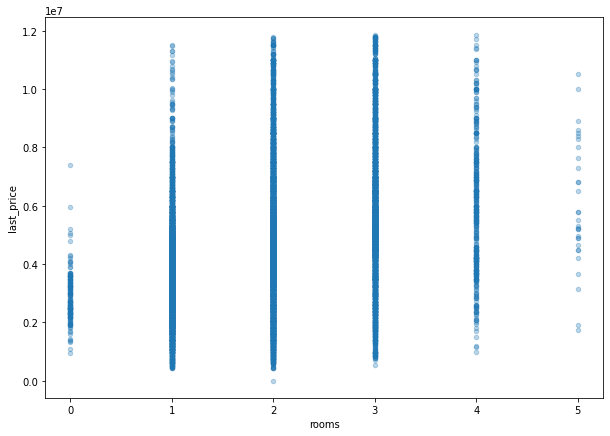

In [28]:
good_data.plot(x = 'rooms', y = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (10, 7))
print('Коэффициент корреляции: {}'.format(good_data['rooms'].corr(good_data['last_price'])))

Вывод:
- Разброс цен студий или квартир с 0 комнат самый незначительный, также такая недвижимость является наиболее дешевой относително остальной.  
- Однокомнатных квартир с высокой ценой меньше, чем со стредней инизкой.
- Квартиры с 2, 3, 4 или 5 комнатами бывают как дешевые так и дорогие, зависимости от цены практически нет.

Изучение зависимости цены от удаленности от центра.

Коэффициент корреляции: -0.15530660470582663


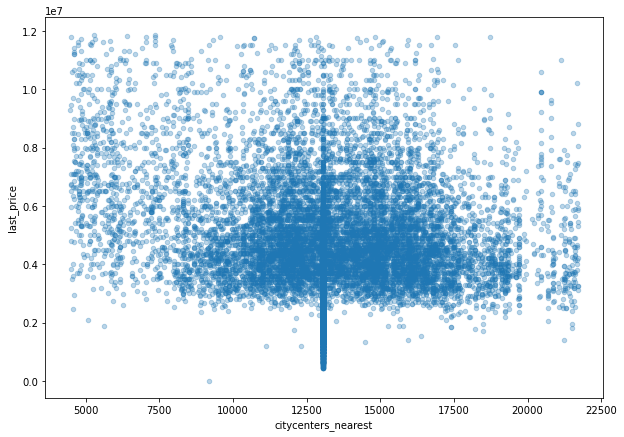

In [29]:
good_data.plot(x = 'citycenters_nearest', y = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (10, 7))
print('Коэффициент корреляции: {}'.format(good_data['citycenters_nearest'].corr(good_data['last_price'])))

Вывод: зависимость очень слабая.

Изучение зависимости цены от этажа.

<AxesSubplot:xlabel='floor_category_numeric', ylabel='last_price'>

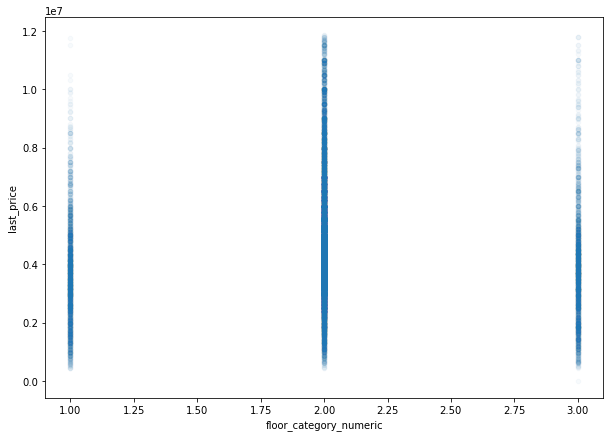

In [30]:
#  по какой - то неизведанной мне причине, в онлайн версии тетрадки, при построении этого графика возникает ошибка: 
# "scatter requires x column to be numeric", если по оси откладывать столбец 'floor_category', в котором находятся
# данные типа object, в то время как в локальной версии проблем нет, все отлично строится. Функцией ниже, я заменил 
# первый на 1, другой на 2, последний на 3.
def floor_category_numeric(row):
    if row['floor'] == 1: return 1
    if row['floor'] == row['floors_total']: return 3
    return 2
good_data['floor_category_numeric'] = good_data.apply(floor_category_numeric, axis=1) 
good_data.plot(x = 'floor_category_numeric', y = 'last_price', kind = 'scatter', alpha = 0.03, figsize = (10, 7))

Вывод: первый и последний этаж не очень популярны по сраврению с этажами между. "Другие" этажи не зависят от цены.

Изучение зависимости цены от даты размещения.

<AxesSubplot:xlabel='DateNum', ylabel='last_price'>

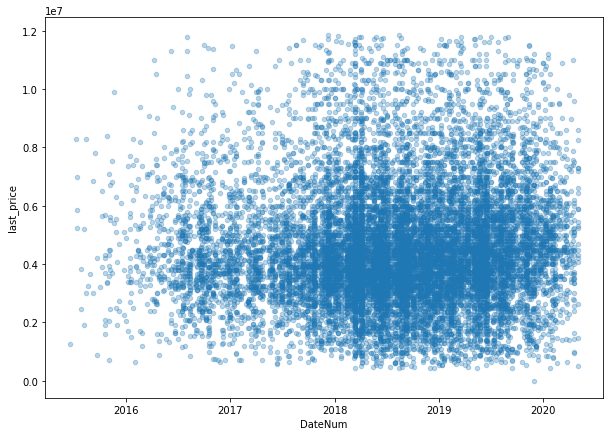

In [31]:
#  по какой - то неизведанной мне причине, в онлайн версии тетрадки, при построении этого графика возникает ошибка: 
# "scatter requires x column to be numeric", если по оси откладывать столбец 'first_day_exposition', в котором находятся
# данные типа datetime64[ns], в то время как в локальной версии проблем нет, все отлично строится. 
good_data['DateNum'] = good_data.first_day_exposition.dt.year + good_data.first_day_exposition.dt.month / 12. + good_data.first_day_exposition.dt.day / 30.
good_data.plot(x = 'DateNum', y = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (10, 7))

Вывод: зависимости от цены нет, но большинсво объявлений публикуются в опреденнй промежуток времени.

Общий вывод: цена квартиры сильнее зависит от площади и этажа и менее от расстояния до центра и количества комнат.

Выбор 10 населённых пунктов с наибольшим числом объявлений. Посчет средней цены квадратного метра в этих населённых пунктах. Поиск населённых пунктов с самой высокой и низкой стоимостью жилья.

In [32]:
top_10_locality_name = good_data.groupby('locality_name')['last_price'].count().sort_values(ascending = False).head(10)#.reset_index()
print('10 населённых пунктов с наибольшим числом объявлений:')
display(top_10_locality_name)
print()
total_area_query = good_data.query('locality_name in @top_10_locality_name.index')
top_10_locality_name_price = total_area_query.groupby('locality_name')['last_price'].mean().sort_values(ascending = False).reset_index()
print('Средняя цена квадратного метра:')
display(top_10_locality_name_price)


10 населённых пунктов с наибольшим числом объявлений:


locality_name
санкт-петербург      10474
посёлок мурино         487
всеволожск             339
посёлок парголово      277
деревня кудрово        266
гатчина                260
выборг                 192
посёлок шушары         180
кудрово                166
сертолово              121
Name: last_price, dtype: int64


Средняя цена квадратного метра:


,locality_name,last_price
0,санкт-петербург,5.319708e+06
1,кудрово,4.542906e+06
2,посёлок парголово,4.452113e+06
3,деревня кудрово,4.239739e+06
4,посёлок шушары,4.040647e+06
5,всеволожск,3.685886e+06
6,посёлок мурино,3.634812e+06
7,сертолово,3.548565e+06
8,гатчина,3.356094e+06
9,выборг,2.946380e+06


Вывод: в Санкт-Петербурге больше всего объявлений о продажи недвижимости. Санкт-Петербург - населённый пункт с самой высокой средней стоимостью жилья. Выборг - с самой низкой средней стоимостью.

Изучение предложений квартир. Расчет средний цены для каждого километра. График зависимости цены от удалённости от центра.

,mean_price
citycenters_nearest_km,
0,245833.530370
1,177005.407604
2,157849.007290
3,121507.831638
4,133282.874738
5,140453.957005
6,151012.193673
7,156176.879524
8,125649.733148


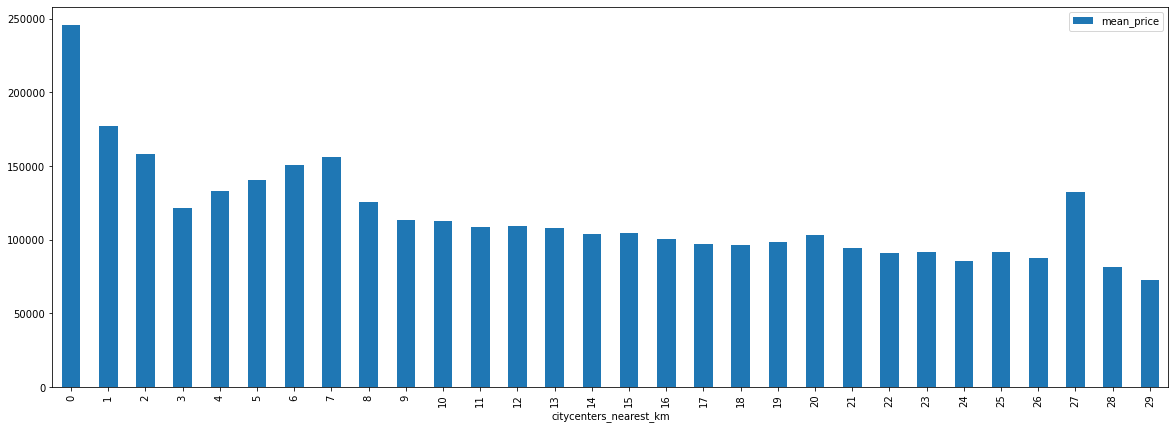

In [33]:
data_spb = data.query('locality_name == "санкт-петербург"')

data_spb['citycenters_nearest_km'] = (data_spb['citycenters_nearest'] / 1000).round()
data_spb['citycenters_nearest_km'] = data_spb['citycenters_nearest_km'].astype('int64')
pivot_table_citycenter_mean = data_spb.pivot_table(index = 'citycenters_nearest_km', values = 'square_meter_price', aggfunc = 'mean')
pivot_table_citycenter_mean.columns = ['mean_price']
display(pivot_table_citycenter_mean)
pivot_table_citycenter_mean.sort_values('citycenters_nearest_km').plot(kind = 'bar', y = 'mean_price', figsize = (20, 7))
plt.show()

Вывод. Центом можно считать расстояние от 0 до 8 км, как раз в этом месте график меняется. Также имеется выброс в найоне 27го километра.

Анализ квартир в центре. Отличаются ли они от общих выводов по всему городу?

In [34]:
data_spb_center = good_data.query('locality_name == "санкт-петербург"')
data_spb_center = data_spb_center.reset_index(drop = True)
data_spb_center['citycenters_nearest_km'] = (data_spb_center['citycenters_nearest'] / 1000).round()
data_spb_center['citycenters_nearest_km'] = data_spb_center['citycenters_nearest_km'].astype('int64')
data_spb_center = data_spb_center.query('citycenters_nearest_km <= 8') #квартиры в центре

Зависимость стоимости от числа комнат.

Коэффициент корреляции: 0.4081967721595034


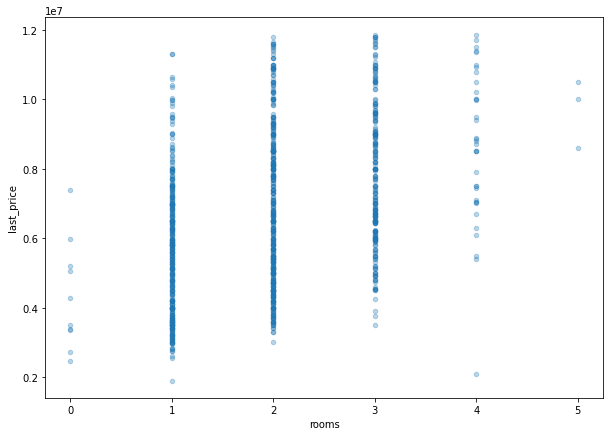

In [35]:
data_spb_center.plot(x = 'rooms', y = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (10, 7))
print('Коэффициент корреляции: {}'.format(data_spb_center['rooms'].corr(data_spb_center['last_price'])))

Вывод. есть зависимость, но не слишком сильная.

Зависимость стоимости от этажа.

<AxesSubplot:xlabel='floor_category_numeric', ylabel='last_price'>

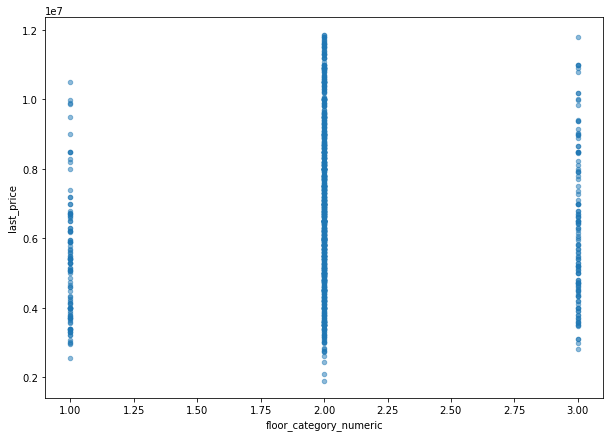

In [36]:
data_spb_center.plot(x = 'floor_category_numeric', y = 'last_price', kind = 'scatter', alpha = 0.5, figsize = (10, 7))

Вывод. есть зависимость, предпочитают купить не первый и не последний этаж.

Зависимость стоимости от удалённости от центра

Коэффициент корреляции: -0.19993405458814884


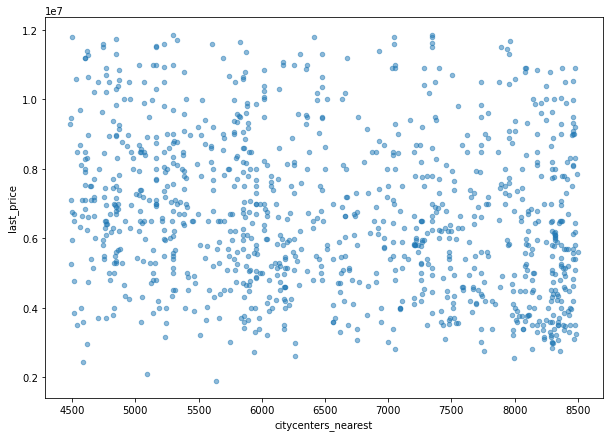

In [37]:
data_spb_center.plot(x = 'citycenters_nearest', y = 'last_price', kind = 'scatter', alpha = 0.5, figsize = (10, 7))
print('Коэффициент корреляции: {}'.format(data_spb_center['citycenters_nearest'].corr(data_spb_center['last_price'])))

Зависимости совсем нет.

Зависимость стоимости от даты размещения объявления

<AxesSubplot:xlabel='DateNum', ylabel='last_price'>

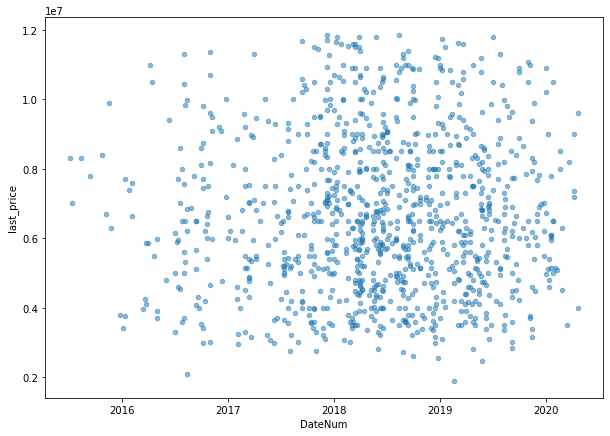

In [38]:
data_spb_center.plot(x = 'DateNum', y = 'last_price', kind = 'scatter', alpha = 0.5, figsize = (10, 7))

Вывод: зависимости от цены нет, но большинсво объявлений публикуются в опреденнй промежуток времени.

### Шаг 5. Общий вывод.

Были проанализированны параметры:
- зависимость цены от площади; 
- зависимость цены от числа комнат;
- зависимость цены от удалённости от центра;
- зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом;

Те же параметры были проанализированны для квартир, находяхщихся в относительной близости от центра.

Итог:

В среднем, цена квартры зависит от площади и этажа, и удаленности от центра. Менее от количества комнат и даты размещения объявления. Данный тезис также справедлив для квартир, находящихся в центре.
